In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Многосеточные методы

Рассмотрим [уравнение Пуассона](https://ru.wikipedia.org/wiki/Уравнение_Пуассона) в простейшем одномерном случае:

$$f''(x)=g(x),\quad x\in[0,1].\quad \text{(1)}$$

Данное уравнение возникает во многих задачах физики, например, уравнение Пуассона совпадает с уравнением теплопроводности при условии зануления производной по времени, и следовательно может описывать стационарное распределения температуры $f$ для функции источника $g$. 

Решение дифференциального уравнения однозначно определено при задании граничных условий. Для простоты мы потребуем выполнения условий Дирихле:

$$f(0)=f(1)=0.$$

Аналитическое решение уравнения Пуассона известно, однако для численного решения уравнения, т.е. нахождения значений $f$ заданные моменты времени, аналитическое выражение оказывается не лучше, чем численные методы решения дифференциальных уравнений, некоторые из которых рассматриваются ниже.

Для численного решения дифференциальное решение должно быть дискретезовано, т.е. вместо поиска функции $f\in C^2[0,1]$, для задания которой нужно бесконечное число значений, ищется некоторое приближение функции, задаваемое конечным набором значений $f_k$, $k=0\ldots N-1$. Значения $f_k$ находятся решением дискретного аналога уравнения (1). Дискретизация корректна, если при стремлении размерности $N$ пространства решений к бесконечности, приближенное решение стремится к точному решению $f$ в некоторой подходящей норме.

Простейшей дискретизацией являются решеточные модели, в которых функция задается своими значениями $f_k=f(x_k)$ в узлах некоторой решетки $x_k$. 
Производные в дифференциальном уравнении можно приблизить разделенными разностями, стараясь получиться минимальную погрешность приближения.
Для простоты выберем решетку с постоянными шагом $h$, $x_{k+1}-x_k=h\forall k$.
Хранить значения функции на концах интервала не нужно, так как они заданы граничными условиями и всегда равны $0$ в нашей задаче. Для удобства обозначим концы интервала так $x_{-1}=0$, $x_{N}=1$, однако значения функции $f$ в этих точках не относятся к искомым переменным. 
Тогда $h=\frac{1}{N=1}$, $x_k=\frac{k+1}{N+1}$.
Вторые производные приближаем конечными отношениями:

$$f''(x_k)=\frac{f_{k+1}-2f_k+f_{k-1}}{h^2}+O(h^2).$$

Дискретный вариант дифференциального уравнения принимает вид системы дифференциальных уравнений:

$$(N+1)^2(f_{k+1}-2f_k+f_{k-1})=g_k,\quad \forall k=0\ldots N-1,$$

где $g_k=g(x_k)$.
Заметим, что в уравнения мы формально включили значения $f_{-1}$ и $f_N$, 
однако они не являются неизвестными и должны быть отнесены к правой части системы,
а в рассматриваемом случае эти значения равны нулю и их можно отбросить.

Систему можно записать в виде $AF=B$, где $F=(f_k)_{k=0}^{N_1}$ - 
стоблец значений искомой функции в узловых точках,
$B=(g_k)_{k=0}^{N_1}$ - неоднородный член, посчитанный в узловых точках, а $A\in Mat(N\times N,\mathbb R)$ - матрица системы,
представляющая собой дискретизацию оператора второй производной $\frac{d^2}{dx^2}$:

$$A=(N+1)^2\begin{pmatrix}
-2 & 1 & 0 & 0 &\cdots \\
1 & -2 & 1 & 0 &\cdots \\
0 & 1 & -2 & 1 &\cdots \\
0 & 0 & 1 & -2 &\cdots \\
\cdots & \cdots & \cdots & \cdots & \ddots \\ 
\end{pmatrix}.$$

Эксперимент 0. Решетка с 1 узлами.
Эксперимент 1. Решетка с 2 узлами.
Эксперимент 2. Решетка с 4 узлами.
Эксперимент 3. Решетка с 8 узлами.
Эксперимент 4. Решетка с 16 узлами.
Эксперимент 5. Решетка с 32 узлами.
Эксперимент 6. Решетка с 64 узлами.
Эксперимент 7. Решетка с 128 узлами.
Эксперимент 8. Решетка с 256 узлами.
Эксперимент 9. Решетка с 512 узлами.


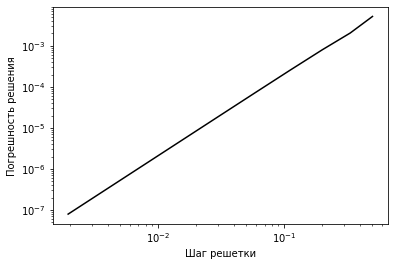

In [2]:
# Решим дискретизованное уравнение простейшим способом, сформировав матрицу системы, 
# и используя встроенные методы для решения системы.

# Ограничимся случаем g(x)=x.
# В этом случае известно аналитическое решение f(x)=x(x*x-1)/6.

def xk(N):
    """Массив узлов решетки x_k=(k+1)/(N+1)."""
    return np.linspace(0, 1, N+2)[1:-1]
    # альтернативно
    # return np.arange(1, N+1, dtype=float)/(N+1)

def B(N):
    """Правая часть системы для данного размера системы N."""
    x = xk(N)
    return x*(x-1)

def A_dense(N):
    """Матрица системы для данного размера N."""
    h2 = (N+1)**2 # Обратное к квадрату шага решетки.
    a = np.zeros((N,N))
    # Заполняем главную диагональ:
    a[np.arange(N), np.arange(N)] = -2*h2
    # Отметим, что мы используем значительно более быстрый способ инициализации матрицы,
    # чем перебор элементов в цикле, так как интерпретатор Python работет значительно медленнее,
    # чем реализация индексации в NumPy, реализованная на низкоуровневом языке.
    # Здесь мы использовали индексацию массивом, см. https://numpy.org/devdocs/user/basics.indexing.html
    # Не нужно путать с индексацией срезами a[0:N, 0:N], которая дает совсем другой ответ.
    
    # Заполняем верхнюю побочную диагональ.
    a[np.arange(N-1), np.arange(1,N)] = h2
    
    # Заполняем нижнюю побочную диагональ.
    a[np.arange(1,N), np.arange(N-1)] = h2
    
    return a

def f_explicit(N):
    """Точное решение уравнения f''(x)=1, f(0)=f(1), вычисленное в узлах x_k=(k+1)/(N+1)."""
    x = xk(N)
    return (x**4-2*x**3+x)/12

# Проведем сравнение решений дискретизованного уравнения с аналитическим для разных шагов решетки.
NN = 2**np.arange(10) # Набор числа узлов решеток для испытаний.
error = np.empty(len(NN), dtype=float)
for n, N in enumerate(NN): # Перебираем все размеры N решеток, номер эксперимента храним в n.
    print(f"Эксперимент {n}. Решетка с {N} узлами.")
    # Для решения линейной системы мы используем функцию solve пакета numpy.linalg,
    # упрощающего работу с линейными операторами и матрицами в частности.
    f = np.linalg.solve(A_dense(N), B(N))
    # Норму ошибки мы находим с помощью функции numpy.linalg.norm, позволяющей находить
    # разнообразные нормы векторов и матриц. 
    # Параметр ord=np.inf указывает, что мы интересуемся l_inf нормой.
    error[n] = np.linalg.norm(f_explicit(N)-f, ord=np.inf)
hh = 1/(NN+1) # шаги решеток

# Строим график ошибки дискретизации от шага решетки:
plt.loglog(hh, error, '-k')
plt.xlabel("Шаг решетки")
plt.ylabel("Погрешность решения")
plt.show()


Как мы видим, ошибка дискретизации стремится к нулю при бесконечном уменьшении шага, это значит что дискретизация была проведена верно (но не обязательно оптимально).
Далее мы сосредоточимся на вопросах решения полученной системы дифференциальных уравнений. 

Матрица системы для одномерного уравнения Пуассона трехдиагональна (имеет конечное число диагоналей для дифференциальных уравнений общего вида), поэтому ее решение можно эффективно получить за время $O(N)$, см.
[метод прогонки](https://ru.wikipedia.org/wiki/Метод_прогонки).

# Задание

1. Реализуйте метод прогонки. Решите систему уравнений из примера выше методом прогонки. 

2. Оцените погрешность решения уравнения методом прогонки. Как связана погрешность с числом обусловленности матрицы $A$ системы? Как связана точность решения и невязка?

Для многомерного уравнения Пуассона и для многих других задач матрица системы имеет более сложную форму, поэтому метод прогонки не подходит. 
Далее мы будем рассматривать методы, которые могут быть применены и для более сложных случаев. 
Заметим, что большинство элементов матрицы являются нулями, такие матрицы называются разряженными.
Для хранения разряженной матрицы достаточно сохранять только ненулевые элементы и их положение, что позволяет значительно экономить место для хранения.
Умножение разряженной матрицы на вектор занимает время, пропорциональное числу ненулевых элементов матрицы, что ускоряет расчеты.
К сожалению, метод Гаусса и многие факторизации матриц преобразуют разряженную матрицу в полную, тем самым теряются все преимущества разрященных матриц.
Для решения систем с разряженными матрицами используются итерационные методы.

In [3]:
# NumPy имеет старшего брата SciPy, который умеет работать с разряженными матрицами.
from scipy.sparse import diags

def A_sparse(N):
    """Возращает разряженное представление матрицы A."""
    # Для хранения матрицы A лучше всего подходит хранение матрицы по диагоналям, 
    # так как все диагонали кроме трех равны нулю.
    data = [ -2 * np.ones(N), np.ones(N), np.ones(N) ]
    return diags(data, offsets=[0, 1, -1], shape=(N,N), format="csr" ) * (N+1)**2

# Проверим, что разряженная матрица совпадает с ранее определенной полной.
import numpy.testing as npt
npt.assert_almost_equal(A_sparse(5).toarray(), A_dense(5))

# Решим систему встроенным решателем.
from scipy.sparse.linalg import spsolve
N = 1000
a = A_sparse(N)
b = B(N)
%time f_sparse = spsolve(a, b)
# и сравним с решением через полную матрицу:
a = A_dense(N)
%time f_dense = np.linalg.solve(a, b)
print("Ошибка:", np.linalg.norm(f_sparse-f_dense))
# С помощью директивы %timeit мы сравнили время работы решателей для плотной и разряженной матрицы.
# Для достаточно больших N разряженные матрицы значительно выигрывают.

CPU times: user 533 µs, sys: 119 µs, total: 652 µs
Wall time: 656 µs
CPU times: user 66.4 ms, sys: 10.4 ms, total: 76.8 ms
Wall time: 23.9 ms
Ошибка: 6.312941899703867e-16


# Задание

3. Какие форматы хранения разряженных матриц существуют? В чем их отличия?
4. Какой алгоритм использует метод `scipy.sparse.linalg.spsolve`?

Далее мы хотим достичь большего контроля над решением систем, поэтому мы реализуем свой вариант [метода Якоби](https://ru.wikipedia.org/wiki/Метод_Якоби).
Вспомним, что обратную матрицу можно вычислить через ряд следующим образом:
$$(1-Y)^{-1}=\sum_{k=0}^\infty Y^k,$$
при условии, что $\|Y\|<1$.
Приведем систему $AF=B$ к такому виду матрицы:
$$(1-(1-A))F=B
\quad\Rightarrow\quad
F=((1-(1-A))^{-1}B=\sum_{k=0}^\infty (1-A)^k B,$$
что позволяет нам итерационно находить решение в виде частичных сумм:
$$F^{(k)} = \sum_{k=K}^\infty (1-A)^k B.$$
Естественно ввести рекуррентную формулу для вычисления частичных сумм последовательно накапливая слагаемые:
$$F^{(0)} = 1,\quad F^{(k+1)}=F^{(k)}+(1-A)^k B.$$

# Задание.

5. Объясните, чем плоха эта формула? Как изменяется погрешность с ростом $K$?

Однако лучшим вариантом будет определить частичную сумму через
$$F^{(k+1)}=B+(1-A)F^{(k)}=F^{(k)}-R[F^{(k)}],$$
где величина $R[f]=Af-B$ называется невязкой.
При условии $\|1-A\|<1$ последовательность $F^{(k)}$ сходится к некоторой функции $F$,
на которой невязка равна нулю $R[F]=0$, т.е. $F$ является решением уравнения $AF=B$.

# Задание.

6. Что происходит с ошибкой при итерациях по этой формуле? Каким можно брать начальное $F^{(0)}$?

К сожалению, наша матрица $A$ отличается от единичной матрицы слишком сильно, и указанные итерации для нее не сойдутся. Однако мы можем преобразовать исходную систему, сохраняя ее решение, таким образом, чтобы матрица новой системы удовлетворяла условию сходимости.
Пусть матрица $P$ не вырождена.
Тогда множество решений систем $AF=B$ и $PAF=PB$ совпадает, в этом контексте матрица $P$ называется предобуславливанием.
Для новой системы итерации принимают вид:
$$F^{(k+1)}=F^{(k)}-PR[F^{(k)}],$$
а сходиться они будут при $\|1-PA\|<1$.
Условие сходимости можно интерпретировать так: матрица $P$ близка к обратной матрице к $A$
(в случае $P=A^{-1}$ решение находится за одну итерацию).
В методе Якоби в качестве предобуславливания выбирают диагональную матрицу, 
с диагональю из обратных элементов к $A$:
$$P=\mathrm{diag}_k (A_{kk})^{-1}.$$
В этом случае условие сходимости гарантированно выполняется, если матрица $A$ обладает свойством [диагонального преобладания](https://u.wikipedia.org/wiki/Диагональное_преобладание), что справедливо для матрицы второй конечной разности. 

Итерации в методе Якоби и прочих итерационных методах повторяются до достижения условия останова.
В качестве такого критерия обычно используют достаточно малую величину невязки:
$$\|R[F^{(k)}]\|<\epsilon.$$

Кроме предобуславливания часто добавляют еще релаксационный множитель $\alpha$ в итерации:
$$F^{(k+1)}=F^{(k)}-\alpha PR[F^{(k)}],$$
который позволяет иногда достичь сходимости, если условия сходимости не выполнялись, установив $\alpha<1$.
Иногда скорость сходимости можно увеличить, установив $\alpha>1$.

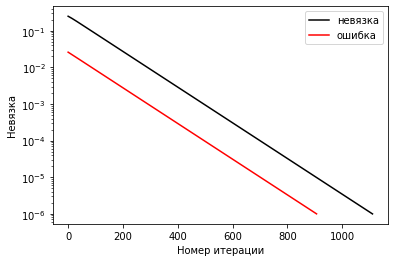

In [4]:
# Реализуем метод Якоби.

def residual(F, A=None, B=None): 
    """Возвращает невязку R[F]=AF-B."""
    # Используем именованные параметры, чтобы уменьшить вероятность неправильного вызова.
    return A(F)-B
    

def solve_Jacobi(A=None, B=None, P=None, F=None, tol=None, maxiter=10000, alpha=1.0, norm=np.inf, exact=None):
    """
    Решает систему PAF=PB. 
    Возвращает приближенное решение F и историю изменения нормы невязки.
    Останавливается либо когда невязка |R[F]|<tol, либо достигнуто максимальное число итераций.
    Установка любого из ограничений в None запрещает это условие останова.
    Аргумент F содержит начальное приближение для решения.
    Если debug установлен в True, то выводит прогресс вычислений.
    alpha - релаксационный множитель.
    Если передано `exact`, то вместо невязки используется отличие решения от точного решения `exact`.
    """ 
    F = np.zeros_like(B) if F is None else F.copy()
    hist = np.zeros(maxiter, dtype=float)
    
    for n in range(maxiter):
        r = residual(F, A=A, B=B)
        hist[n] = r_norm = np.linalg.norm(r if exact is None else F-exact, norm)
        if not tol is None and r_norm<tol:
            return F, hist[:n+1]
        F -= alpha*P(r)
    # Полезно предупреждать пользователя, если что-то пошло не так.
    # Далее мы везде выводим невязки, поэтому предупреждение избыточно.
#     if not tol is None: 
#         print(f"Предупреждение: требуемая точность не достигнута. Лучший результат {r_norm}.")
    return F, hist
   
# Итерационные методы не используют явный вид матрицы A, необходимо лишь вычислять произведение AF.
# Умножение A в виде разряженной матрицы на вектор F дает ответ намного быстрее, чем умножение полной матрицы.
# Однако еще быстрее посчитать AF с помощью специальной функции.
def A(f):
    """Возвращает произведение A_dense(N)@f, но делает это очень быстро."""
    r = -2*f
    r[1:] += f[:-1]
    r[:-1] += f[1:]
    return (f.shape[0]+1)**2 * r
    
# Проверяем эквивалентность определению выше.
N = 10
f = np.random.randn(N)
npt.assert_almost_equal(A_dense(N)@f, A(f))
    
def D(f):
    """
    Применяет предобуславливание по методу Якоби, т.е. делит `f` поэлементно на диагональ матрицы `A`.
    """
    return -f/2/(f.shape[0]+1)**2

# Решим уравнение методом Якоби.
N = 20
_F, hist_r = solve_Jacobi(A=A, B=B(N), P=D, tol=1e-6)
# Сравним с решением через плотную матрицу.
F_solve = np.linalg.solve(A_dense(N), B(N))
_F, hist_s = solve_Jacobi(A=A, B=B(N), P=D, tol=1e-6, exact=F_solve)

# Построим график зависимости невязки от номера итерации.
plt.semilogy(hist_r, '-k', label='невязка')
plt.semilogy(hist_s, '-r', label='ошибка')
plt.legend()
plt.xlabel("Номер итерации")
plt.ylabel("Невязка")
plt.show()

# Задание

7. С какой точностью найдено решение $F$, когда $\|R[F]\|<\epsilon$?
8. По какому закону уменьшается невязка при итерациях по методу Якоби? Как скорость сходимости зависит от матрицы $A$ и начального приближения $F$?
9. Какую норму невязки нужно использовать: $l^\inf$, $l^2$, $l^1$ или другую? 

Ранее мы видели, что для достижения достаточной точности дискретизации, нужно взять достаточно мелкую решетку. 
Однако при измельчении решетки скорость сходимости быстро падает.

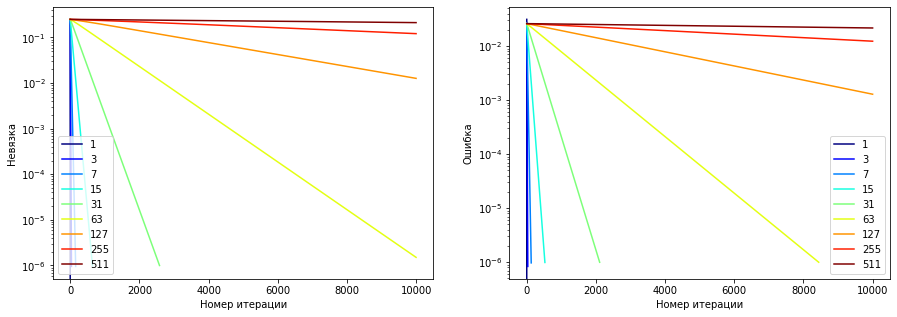

In [5]:
# Изучим сходимость при разных размерах решеток.
NN = 2**np.arange(1, 10)-1
colors = plt.get_cmap('jet')(np.linspace(0,1,len(NN)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

for N, c in zip(NN, colors):
    _F, hist = solve_Jacobi(A=A, B=B(N), P=D, tol=1e-6)
    ax1.semilogy(hist, '-', label=f"{N}", color=c)
    _F, hist = solve_Jacobi(A=A, B=B(N), P=D, tol=1e-6, exact=np.linalg.solve(A_dense(N), B(N)) )
    ax2.semilogy(hist, '-', label=f"{N}", color=c)
    
ax1.legend()
ax1.set_xlabel("Номер итерации")
ax1.set_ylabel("Невязка")

ax2.legend()
ax2.set_xlabel("Номер итерации")
ax2.set_ylabel("Ошибка")
plt.show()

Время каждой итерации растет с ростом $N$, но еще хуже, что быстро растет число итераций, 
необходимых для достижения заданной точности. 
Хорошее предобуславливание могло бы значительно ускорить сходимость.
Другой вариант уменьшить число итераций - это выбрать хорошее начальное приближение.
Так как мы работаем с дискретизациями одного дифференциального уравнения, решения для разных $N$ отличаются не очень сильно, и решения на одной решетке могли бы служить хорошим приближением для решения на более мелких решетках. 

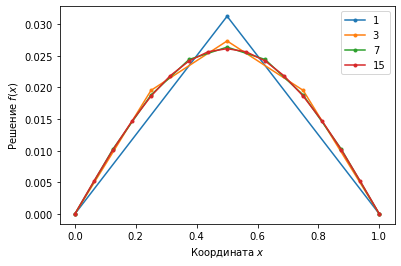

In [6]:
# Сравним вид решений на решетках разной плотности.
NN = 2**np.arange(1, 5)-1
for N in NN:
    F = np.zeros(N+2, dtype=float)
    F[1:-1] = np.linalg.solve(A_dense(N), B(N))
    plt.plot(np.linspace(0, 1, N+2), F, '.-', label=f"{N}")

plt.legend()
plt.xlabel("Координата $x$")
plt.ylabel("Решение $f(x)$")
plt.show()

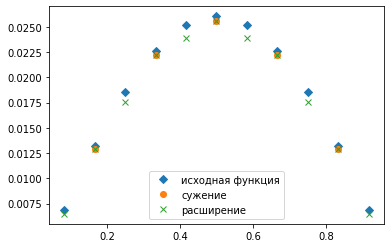

In [7]:
# Далее нам нужны операторы перехода между решетками.

def restrict(F):
    """Сужает решение на в два раза более редкую решетку с фильтрацией."""
    return ((F[2:]+F[:-2])*0.25+F[1:-1]*0.5)[::2]

def restrict_naive(F):
    """Сужает решение на в два раза более редкую решетку без фильтрации."""
    return F[1:-1:2]

def prolongate(F):
    """Интерполирует решение на в два раза более плотную решетку."""
    r = np.empty(F.shape[0]*2+1)
    r[1::2] = F
    r[2:-1:2] = (F[1:]+F[:-1])*0.5
    r[0] = F[0]*0.5
    r[-1] = F[-1]*0.5
    return r

x = xk(11)
F = f_explicit(x.shape[0])
plt.plot(x, F, 'D', label="исходная функция")
F = restrict(F)
plt.plot(xk((x.shape[0]-1)//2), F, 'o', label="сужение")
F = prolongate(F)
plt.plot(x, F, 'x', label="расширение")
plt.legend()
plt.show()

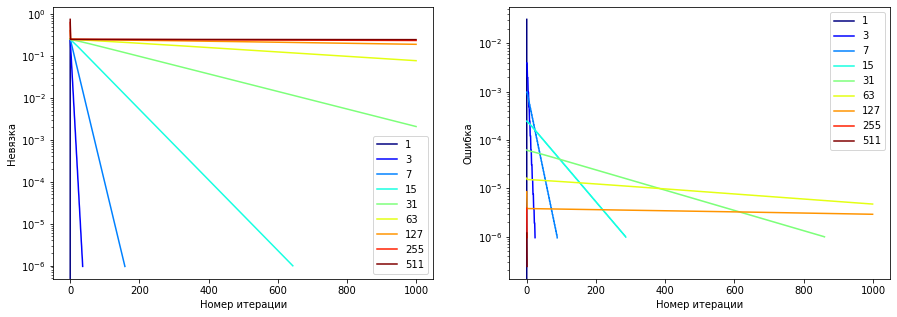

In [8]:
# Повторим вычисления методом Якоби для уплотняющихся решеток, 
# однако будем использовать решение на редкой решетке, 
# как начальное приближение на плотной решетке. 
F = None # Начальное приближение

N = 1 # Размер начальной решетки.
n_grids = 9 # Число решеток.

# Создаем палитру плавно изменяющихся цветов.
colors = plt.get_cmap('jet')(np.linspace(0,1,n_grids))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Перебираем решетки в порядке их уплотнения.
for n in range(n_grids):
    _F, hist = solve_Jacobi(A=A, B=B(N), P=D, F=F, tol=1e-6, maxiter=1000) # Дооптимизируем решение.
    ax1.semilogy(hist, '-', label=f"{N}", color=colors[n])
    F, hist = solve_Jacobi(A=A, B=B(N), P=D, F=F, tol=1e-6, maxiter=1000, exact=np.linalg.solve(A_dense(N), B(N)) )
    ax2.semilogy(hist, '-', label=f"{N}", color=colors[n])
    F = prolongate(F)
    N = F.shape[0]

    
ax1.legend()
ax1.set_xlabel("Номер итерации")
ax1.set_ylabel("Невязка")

ax2.legend()
ax2.set_xlabel("Номер итерации")
ax2.set_ylabel("Ошибка")
plt.show()

# Задание.

10. Теоретически оцените, как скорость сходимости зависит от размера $N$ решетки.

11. Попробуйте объяснить уменьшения ошибке при старте итераций с интерполировованного решения. Почему невязка при этом не уменьшается?

Последовательно находя решения на все более плотных решетках и интерполируя их на более плотные, мы смогли получить на много порядков более высокую точность на самой плотной решетке, тем самым значительно ускорив вычисления. 
Использование многих решеток для последовательного уточнения решения называется [многорешеточным методом](https://en.wikipedia.org/wiki/Multigrid_method).

Можно дать  следующее наивное объяснение эффективности многосеточного метода. 
На одной итерации методом Якоби между собой могут провзаимодействовать только соседние значения в векторе решений, но изменение любой координаты в правой части уравнение изменяет все решение, т.е. согласоваться должны все координаты, что потребует минимум $N$ итераций (на самом деле много больше).
Исплользуя решетки меньшей плотности мы позволяем согласовываться дальше расположенным координатам,
что ускоряет решение.

Наша текущая реализация многорешточного метода выполняет некоторое количество избыточных вычислений.
Можно заметить, что невязка проинтерполированного на плотную решетку решения меньше, чем невязка решения на разряженной решетке.
Таким образом, мы делали лишние итерации на разряженной решетке, пытаясь получить дополнительную точность.
Наш метод интерполяции не позволяет получить точное решение на плотной решетке, если мы знали решение
на разряженной, поэтому точность падает непосредственно при интерполировании, и мы не можем получить невязку интерполированного решения ниже, чем при интерполяции точного решения на редкой решетке на плотную.

Чтобы избежать лишних вычислений, мы можем делать лишь несколько итераций метода Якоби на каждой решетке, но в этом случае проходить по пирамиде от самой редко к самой плотной решетке придется несколько раз.

Алгоритм многосеточного метода традиционно выглядит следующим образом. Будем обозначать объекты, относящиеся к решетке $k$ с $N_{(k)}$ узлами нижним индексом $?_{(k)}$. 

1. Дано некоторое начальное приближение $F_{(0)}$ на самой плотной решетке.
2. Вычислим невязку на этом решении $R_{(0)}=A_{(0)}F_{(0)}-B_{(0)}.$

Новое уточненное решение будем искать в виде $F_{(0)}\mapsto F_{(0)}-\Delta_{(0)}$,  
тогда $\Delta_{(0)}$ должно удовлетворять уравнению $A_{(0)}\Delta_{(0)}=R_{(0)}$.
Далее мы пытаемся найти приближенное решение этого уравнения. 

3. Перенесем невязку $R_{(0)}$ на менее плотную решетку c $N_{(1)}$ узлами (часто выбирается каждый второй узел, мы будем использовать линейную интерполяцию). Получившийся после интерполяции $R_{(0)}$ на $N_{(1)}$ узлов вектор  значений обозначим $R_{(1)}$. 

4. Повторим шаг 3 последовательно для всех решеток, интерполируя $R_{(k)}$ на $N_{(k+1)}$ узлов более редкой решетки, результат обозначаем $R_{(k+1)}$.

5. На самой редкой решетке с $N_{(K)}$ узлами мы приближенно решаем уравнение $A_{(K)}\Delta_{(K)}=\Delta_{(K)}$,
делая несколько итераций методом Якоби, используя в качестве начального приближения $\Delta_{(K)}\equiv 0$ (это точное решение, если на шаге 1 ответ было дано точное решение). 

6. Приближенное решение $\Delta_{(k)}$ интерполируем на более плотную решетку с $N_{(k-1)}$ узлами, и используем его как начальное приближение для решения уравнения $A_{(k)}\Delta_{(k)}=\Delta_{(k)}$. Снова для каждой решетки делаем лишь несколько итераций метода Якоби. Повторяем для каждой решетки в порядке из уплотнения.

7. Найденное приближенное решение $\Delta_{(0)}$ на самой плотной решетке используем для обновления решения $F_{(0)}\mapsto F_{(0)}-\Delta_{(0)}$.

8. Повторяем вычисления с шага 1, пока не будет достигнута требуемая точность.

Размер плотной решетки 65535


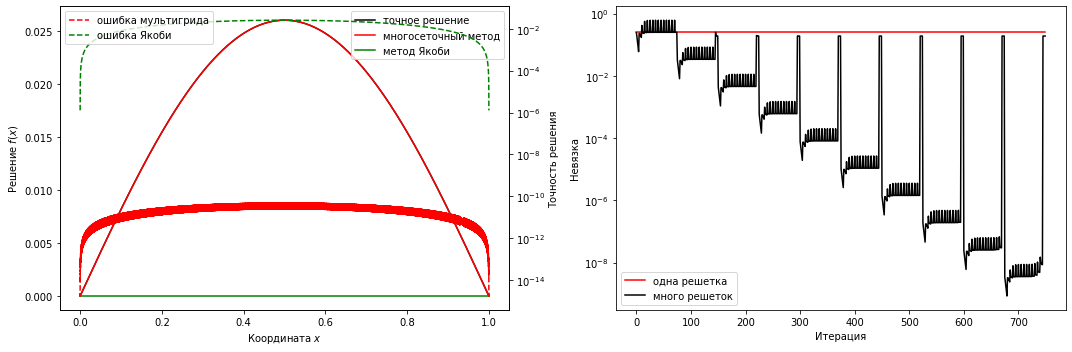

In [9]:
# Реализуем многосеточный метод.

def multigrid(A=None, B=None, P=None, tol=None, maxiter=None, subiter=None, n_grids=1, method=solve_Jacobi, 
              norm=np.inf, exact=None):
    """
    Реализует многосеточный метод для системы вида AF=B,
    где `B` задано вектором размерности, совпадающей с размерностью задачи,
    а A задано семейством функций A(F), вычисляющих A@F для разных размерностей F.
    Метод использует `ngrids` решеток разной плотности, 
    делая `subiter` итераций решателя на каждой решетке.
    Итерации останавливаются, когда сделано `maxiter` проходов по пирамиде решеток,
    либо достигнута невязка меньше `tol` на самой мелкой решетке.
    """
    F = np.zeros_like(B) # Начальное приближение
    hist = np.zeros(maxiter*subiter*n_grids)
    hist_p = 0
    for n in range(maxiter): # Итерируем проходы по пирамиде.
        r0 = residual(F, A, B) # Находим невязку.
        if not tol is None and np.linalg.norm(r0 if exact is None else F-exact, norm)<tol:
            return F, hist
        # Вычисляем невязки на подрешетках.
        rk = [r0]; exactk = [exact]
        for N in range(n_grids-1):
            rk.insert(0, restrict(rk[0]))
            exactk.insert(0, None if exact is None else restrict(exactk[0]))
        delta = None # Начальное приближение для подрешеток.            
        for N in range(n_grids): # Перебираем все решетки в порядке уплотнения.
            # Интерполируем решение на более плотную решетку, если оно ранее было найдено.
            delta = None if delta is None else prolongate(delta) 
            # Делаем итерации методом Якоби.
            delta, h = method(A=A, B=rk[N], P=P, F=delta, maxiter=subiter, norm=norm, exact=exactk[N])
            # Сохраняем информацию о прогрессе, если это самая мелкая решетка.
            hist[hist_p:hist_p+h.shape[0]] = h
            hist_p += h.shape[0]
        # Обновляем решение.
        F -= delta
#     if not tol is None:
#         print("Предупреждение: желаемая точность не достигнута.")
    return F, hist
            
# Проведем вычисления

subiter = 5 # Число итераций на одной решетке.
maxiter = 10 # Число проходов по пирамиде решеток.
n_grids = 15
N = 2*2**15-1
print(f"Размер плотной решетки {N}")

# Для сравнения решаем на одной решетке.
b = restrict(B(2*N+1))
F_s, hist_s = solve_Jacobi(A=A, B=b, P=D, maxiter=maxiter*subiter*n_grids)

# Вычисляем мультигридом.
F_m, hist_m = multigrid(A=A, B=b, P=D, n_grids=n_grids, maxiter=maxiter, subiter=subiter)

# Для сравнения решение с максимальной точностью.
# F_dense = np.linalg.solve(A_dense(N), B(N)) # Не работает на очень больших размерах.
F_dense = f_explicit(N)

assert len(hist_m)==len(hist_s) # Одинаковое число итераций на одной и нескольких решетках

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax2.semilogy(hist_s, '-r', label="одна решетка")
ax2.semilogy(hist_m, '-k', label="много решеток")
ax2.legend()
ax2.set_xlabel("Итерация")
ax2.set_ylabel("Невязка")
        
ax1b = ax1.twinx()
x = xk(N)
ax1.plot(x, F_dense, '-k', label='точное решение')
ax1.plot(x, F_m, '-r', label='многосеточный метод')
ax1.plot(x, F_s, '-g', label='метод Якоби')
ax1b.semilogy(x, np.abs(F_m-F_dense), '--r', label='ошибка мультигрида')
ax1b.semilogy(x, np.abs(F_s-F_dense), '--g', label='ошибка Якоби')
ax1.legend(loc=1)
ax1b.legend(loc=2)
ax1.set_xlabel("Координата $x$")
ax1.set_ylabel("Решение $f(x)$")
ax1b.set_ylabel("Точность решения")

plt.tight_layout()
plt.show()

# Задание.

12. Объясните, почему невязка решения почти не убывает, но решение мультигридом оказывается довольно точным?
13. Проверьте, как изменится скорость сходимости и точность решения, если в качестве оператора сужения исползовать restrict_naive? Объясните отличия.

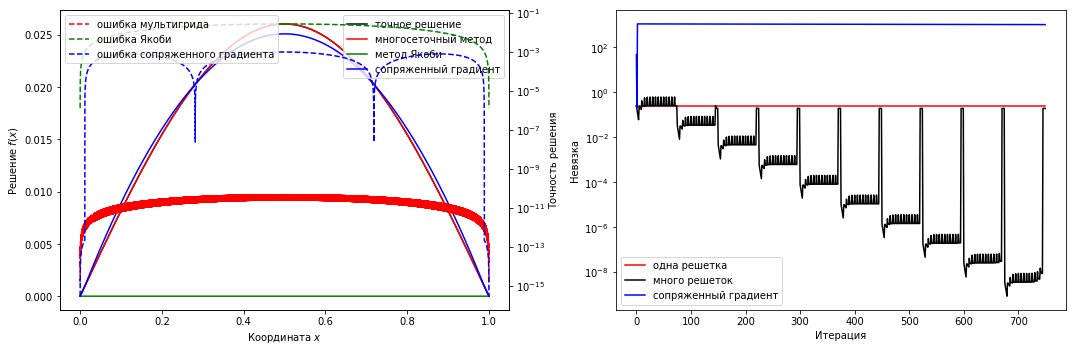

In [10]:
# Метод Якоби далеко не самый быстрый, но очень простой.
# Для сравнения мы реализуем метод сопряженного градиента, действительно часто используемый на практике.
def solve_cg(A=None, B=None, F=None, P=None, tol=None, maxiter=1000, norm=np.inf, exact=None):
    hist = np.zeros(maxiter, dtype=float)
    F = np.zeros_like(B) if F is None else F.copy()
    
    r = -residual(F, A=A, B=B)
    p = r.copy()
    r2 = np.dot(r, r)
    hist[0] = np.sqrt(r2)
    
    for n in range(1, maxiter):
        Ap = A(p)
        alpha = r2/np.dot(p, Ap)
        F += alpha*p
        r -= alpha*Ap

        r2p = np.dot(r, r)
        hist[n] = r_norm = np.linalg.norm(r if exact is None else F-exact, norm) # или np.sqrt(r2p)
        if not tol is None and r_norm<tol:
            return F, hist[:n+1]

        beta = r2p/r2
        p = r + beta*p
        r2 = r2p
#     if not tol is None:
#         print(f"Не сошлось за {maxiter} итераций.")
    return F, hist

F_cg, hist_cg = solve_cg(A=A, B=B(N), maxiter=maxiter*subiter*n_grids, tol=1e-16)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax2.semilogy(hist_s, '-r', label="одна решетка")
ax2.semilogy(hist_m, '-k', label="много решеток")
ax2.semilogy(hist_cg, '-b', label="сопряженный градиент")
ax2.legend()
ax2.set_xlabel("Итерация")
ax2.set_ylabel("Невязка")
        
ax1b = ax1.twinx()
x = xk(N)
ax1.plot(x, F_dense, '-k', label='точное решение')
ax1.plot(x, F_m, '-r', label='многосеточный метод')
ax1.plot(x, F_s, '-g', label='метод Якоби')
ax1.plot(x, F_cg, '-b', label='сопряженный градиент')
ax1b.semilogy(x, np.abs(F_m-F_dense), '--r', label='ошибка мультигрида')
ax1b.semilogy(x, np.abs(F_s-F_dense), '--g', label='ошибка Якоби')
ax1b.semilogy(x, np.abs(F_cg-F_dense), '--b', label='ошибка сопряженного градиента')
ax1.legend(loc=1)
ax1b.legend(loc=2)
ax1.set_xlabel("Координата $x$")
ax1.set_ylabel("Решение $f(x)$")
ax1b.set_ylabel("Точность решения")

plt.tight_layout()
plt.show()


В задачах с большим числом переменных многосеточные методы могут давать более точное приближенное решение, чем метод сопряженного градиента и др. методы высокого порядка. 
Сопряженный градиент дает почти точный ответ через число итераций, равное числу степеней свободы, однако до этого момента решение многосеточным методом дает более аккуратный и качественно верный результат.
Также необходимо учитывать, что итерации сопряженного градиента занимают больше времени, так как требуют вычисления скалярных произведений, хуже распараллеливаются, плюс большинство итераций многосеточного метода делаются на редких решетках, что еще сильнее уменьшает время вычислений.

Так как многосеточный метод можно комбинировать с любыми методами решения систем на подрешетках, то
мы можем еще больше ускорить вычисления, используя сопряженный градиент внутри многосеточного метода.

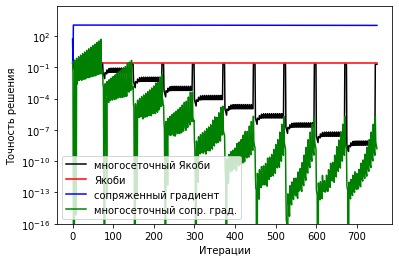

In [11]:
# Сравним с многосеточным методом, делающем на каждой сетке несколько
# итераций сопряженного градиента
_F, hist_mcg = multigrid(A=A, B=B(N), P=D, n_grids=n_grids, maxiter=maxiter, subiter=subiter, method=solve_cg)

plt.semilogy(hist_m, '-k', label="многосеточный Якоби")
plt.semilogy(hist_s, '-r', label="Якоби")
plt.semilogy(hist_cg, '-b', label="сопряженный градиент")
plt.semilogy(hist_mcg, '-g', label="многосеточный сопр. град.")


plt.legend()
plt.xlabel("Итерации")
plt.ylabel("Точность решения")
plt.ylim(1e-16,None)
plt.show()

# Задание

14. Выше мы рассмотрели вариант мультигрида с V-циклом, когда проход от самой мелкой к самой грубой решетке делается один раз. Более эффективным является вариант с W-циклом, когда для решения уравнения на каждой промежуточно решетке запускается свой цикл мультигрида. Реализуйте решатель с W-циклом. Сравните скорость сходимости с V-циклом.

15. Проведите дискретизацию и решите многосеточным методом двумерное уравнение Пуассона:
$$\frac{\partial^2 f}{\partial x^2}+\frac{\partial^2 f}{\partial y^2}=g(x,y),\quad
(x,y)\in[0,1]^2.$$

## Дополнение

Математическое обоснование ускорения при использование многосеточных методов выводится с помощью разложения по собственным функциям оператора $d^2/dx^2$.
Дискретизованный вариант $A$ оператора второй производной имеет собственные функции $e_k$:
$$e_{k,n}=e_k(x_n)=\sin\frac{\pi (k+1)(n+1)}{N+1},\quad k=0\ldots N-1.$$
Легко видеть, что $e_k(0)=e_k(1)=0$.
Действие второй конечной разности также легко может быть найдено:
$$e_{k,n+1}-2e_{k,n}+e_{k,n-1}
=2\left(\cos\frac{k\pi}{N+1}-1\right)e_{k,n}.
$$
Таким образом оператор $A$ имеет собственные числа 
$$\lambda_k=2(N+1)^2\left(\cos\frac{k\pi}{N+1}-1\right),\quad Ae_k=\lambda_k e_k.$$

Все пространство векторов $F$ расскладывается в сумму собственных подпространств для $A$,
инвариантных относительно сложения, умножения на константу и действия $A$.
Таким образом, итерации метода Якоби не перемешиваются собственные подространства
и могут быть проанализированы на каждом подпространстве независимо.
Если $\tilde f_k$ - приближенное решение на подпространстве, натянутом на вектор $e_k$,
то действие оператора $A$ равносильно умножению на число $\lambda_k$.
Тогда невязка равна $\tilde r_k=\lambda_k\tilde f_k-\tilde g_k$,
где $\tilde g_k$ - проекция правой части $g$ уравнения на соответствущее собственное подпространство.
Так как диагональ матрицы $A$ постоянна и равна $-2(N+1)^2$, 
то итерации метода Якоби принимают вид:
$$\tilde f_k\mapsto \tilde f_k-\frac{\lambda_k\tilde f_k-\tilde g_k}{-2(N+1)^2}.$$
Используя разложение по собственным подпространствам, мы можем явно записать решение:
$$\tilde f_k=\frac{\tilde g_k}{\lambda_k}.$$
Разложение по собственным функциям само по себе является эффективным способом решения,
особенно если удается использовать быстрое преобразование Фурье.
Однако для большинства практических задач вычисление собственного базиса является более сложной задачей,
чем решение уравнения.
Поэтому мы используем спектральное разложение только для теоретической оценки сходимости.

Значения $\tilde f_k$ образуют геометрическую прогрессию со знаменателем
$$1-\frac{\lambda_k}{-2(N+1)^2}
=\cos\frac{\pi k}{N+1}=q_k.$$
Как мы видим, каждая компонента сходится со своей скоростью, 
причем чем ниже частота $k$ гармоники, тем больше $q_k$ и скорость сходимости ниже.
При увеличении $N$ максимум $q_k$ быстро стремится к единице, 
что делает метод Якоби не применимым для достаточно мелких решеток:
$$\max_k q_k\approx 1-\frac{\pi^2}{(N+1)^2}.$$

Собственные функции для оператора на решетке остаются собственными при измельчении
решетки в два раза, что следуют из тождества:
$$\frac{\pi (k+1)(n+1)}{N+1}
=\frac{\pi (k+1)2(n'+1)}{2(N'+1)}
$$
где $N=2N'+1$ - размер мелкой решетки, 
$n=2n'+1$ - номера узлов мелкой решетки, соответствущих узлам $n'$ редкой решетки.
Таким образом для в два раза измельченной решетки первая половина собственных функий 
просто переносится с редкой решетки.
Так как множители $q_k$ для этих более грубых решеток ближе к нулю, 
то сходимость на грубой решетке для этих компонент решения быстрее.
Таким образом мы приходим к идее, что для ускорения сходимости мы будем оптимизировать
низкочастотные компоненты на грубых решетках, а высокочастотные на мелких.
Проблемой является то, что на практике у нас нет явного разложения по частотам,
поэтому мы должны придумать процедуру, как переносить на грубые решетки только низкочастотные компоненты,
отбрасывая высокочастотные.
Если мы просто возьмем значения в каждом втором узле, то совершенно одинаковые вклады дает низкочастотная компонента $k$ и высокочастотная компонента $N-k$. 
Однако эти компоненты имеют противоположные знаки на соседних узлах, 
поэтому чтобы отфильтровать высокочастотную компоненту, при сужении на грубую решетку мы берем взвешенное среднее: центральная точка с весом  0.5 и соседние точки с весом 0.25. 
Возвращась с грубой решетки на мелкую мы делаем инерполяцию, чтобы избежать появления высокочастотной компоненты. 